In [5]:
import requests
import json
import pandas as pd
from collections import deque
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [6]:
def dameTitulares(URL, auxTag, auxClase):
    print("url",URL)
    print(f"Filtrando resultados do medio: {URL}")
    _parser = BeautifulSoup(requests.get(URL).content, "html.parser")
    _titulares = _parser.find_all(auxTag, class_=auxClase)
    pilaTitulares = deque()
    for _auxTit in _titulares:
        url = str(_auxTit.find("a").get("href"))
        if url.__contains__("https"):
            pilaTitulares.append([_auxTit.text.strip(), _auxTit.find("a").get("href")])
        else:
            url = URL + url
            pilaTitulares.append([_auxTit.text.strip(), url])
    # print("Pila de titulares",pilaTitulares)
    return (pilaTitulares)

### Leemos el archivo .json con los datos de las paginas web

In [7]:
# medios = pd.read_json("medios.json")
# URLS = []
medios = 'medios.json'
global URLS
with open(medios,"r") as archivo_json:
    URLS = json.load(archivo_json)

URLS

# for i in datos_json:
#     print(datos_json[i])

{'La Voz de Galicia': {'url': 'https://www.lavozdegalicia.es',
  'tag': 'h4',
  'clase': 'a-min-headline'},
 'El País': {'url': 'https://www.elpais.com', 'tag': 'h2', 'clase': 'c_t'},
 'El Mundo': {'url': 'https://www.elmundo.es',
  'tag': 'h2',
  'clase': 'ue-c-cover-content__kicker'},
 '20 Minutos': {'url': 'https://www.20minutos.es',
  'tag': 'h1',
  'clase': 'supra'},
 'El Espanol': {'url': 'https://www.elespanol.com/quincemil',
  'tag': 'div',
  'clase': 'titulo'}}

In [8]:
allTitulares = deque()
enderezos=json.loads(json.dumps(URLS))
for auxURL in enderezos:
    if enderezos[auxURL]['clase'] != "":
        allTitulares.append(dameTitulares(enderezos[auxURL]['url'], enderezos[auxURL]['tag'], enderezos[auxURL]['clase']))
for auxTitular in allTitulares:
 print(auxTitular)

url https://www.lavozdegalicia.es
Filtrando resultados do medio: https://www.lavozdegalicia.es
url https://www.elpais.com
Filtrando resultados do medio: https://www.elpais.com
url https://www.elmundo.es
Filtrando resultados do medio: https://www.elmundo.es
url https://www.20minutos.es
Filtrando resultados do medio: https://www.20minutos.es
url https://www.elespanol.com/quincemil
Filtrando resultados do medio: https://www.elespanol.com/quincemil
deque([['El Congreso rechaza la ley de amnistía y fuerza al PSOE a negociar un nuevo texto', 'https://www.lavozdegalicia.es/noticia/espana/2024/01/30/congreso-rechaza-ley-amnistia-fuerza-psoe-negociar-nuevo-texto/00031706644321258972959.htm'], ['Feijoo advierte al PSOE que se dirige «al abismo» y afirma que recurrirá la amnistía ante la justicia y Europa', 'https://www.lavozdegalicia.es/noticia/espana/2024/01/30/feijooadvierte-psoe-dirige-abismo-afirma-recurrira-amnistia-ante-justicia-europa/00031706634615919971933.htm'], ['Abren juicio oral por

### Creamos un filtro de palabras

In [9]:
filtro = {"a", "una","este","le","e","las","que","ante","y","el","la","del", "bajo", "cabe", "con", "contra", "de", "desde", "durante", "en", "entre", "hacia", "hasta", "mediante", "para", "por", "según", "sin", "so", "sobre", "tras", "versus", "vía"}

### Le damos puntuacion a las pabrabras en funcion de cuantas veces aparezca

In [10]:
dict_palabras_punt = dict()
for i in range(len(allTitulares)):
    for j in range(len(allTitulares[i])):
        #Obtengo el titular completo
        allTitulares[i][j][0]
        #Lo separo en palabras y las guardo en un diccionario donde la clave sea la palabra y el valor las veces que ha aparecido
        titular = allTitulares[i][j][0]
        titular = titular.split(" ")
        #Recorremos la frase
        for palabra in titular:
            #pasamos el flitro
            if (filtro.__contains__(palabra) == False) and (len(palabra)>3):
                if dict_palabras_punt.get(palabra):
                    cantidad = dict_palabras_punt[palabra]
                    cantidad += 1
                    dict_palabras_punt[palabra] = cantidad
                    
                else:
                    dict_palabras_punt[palabra] = 1
dict_palabras_punt


{'Congreso': 3,
 'rechaza': 1,
 'amnistía': 3,
 'fuerza': 1,
 'PSOE': 3,
 'negociar': 1,
 'nuevo': 12,
 'texto': 1,
 'Feijoo': 1,
 'advierte': 1,
 'dirige': 1,
 'abismo»': 1,
 'afirma': 2,
 'recurrirá': 1,
 'justicia': 4,
 'Europa': 3,
 'Abren': 1,
 'juicio': 4,
 'oral': 2,
 'asesinato': 3,
 'cinco': 3,
 'acusados': 1,
 'matar': 1,
 'Samuel': 2,
 'Luiz': 2,
 'Coruña': 33,
 'inflación': 2,
 'repunta': 2,
 'tres': 11,
 'décimas,': 1,
 'subida': 1,
 'factura': 1,
 'echa': 1,
 'tierra': 1,
 'optimistas': 1,
 'previsiones': 1,
 'crecimiento': 1,
 '2024': 4,
 'Gobierno': 9,
 'Seguridade': 1,
 'Social': 1,
 'dixéronme': 1,
 'levaba': 1,
 'medio': 5,
 'morto»': 1,
 'años': 18,
 'negros': 1,
 'comisaría': 1,
 'Ourense:': 1,
 'robo': 1,
 'pistolas,': 1,
 'anónimos': 1,
 'muerte': 1,
 'ahora': 2,
 'archivada': 1,
 'Hugo': 4,
 'Mallo,': 4,
 'presunto': 2,
 'abuso': 4,
 'sexual': 4,
 'Casi': 1,
 '1.200': 1,
 'gallegos': 5,
 'perdieron': 1,
 'pensión': 1,
 'contributiva': 1,
 '2023': 3,
 'superar': 

### Obtenemos las 10 palabras que mas se repiten

<Axes: >

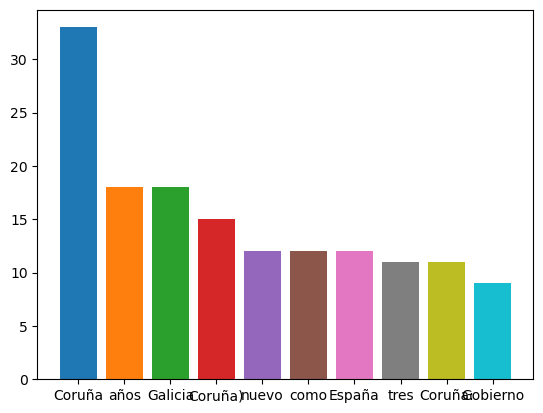

In [11]:
valores_ord = sorted(dict_palabras_punt.items(), key=lambda kv: kv[1],reverse=True)
valores_ord
fig, ax = plt.subplots()
x = []
y = []
i = 0
for pal,rep in valores_ord:
    ax.bar(x = pal, height = rep)
    i += 1
    if i == 10: break
ax

### Puntuamos los titulares y los mostramos por pantalla por mayor puntuacion

In [12]:
#FALLA ALGO EN LA PUNTUACION
all_titulares_punt = []
maxima_punt = 0
for i in range(len(allTitulares)):
    for j in range(len(allTitulares[i])):
        #Obtengo el titular completo
        allTitulares[i][j][0]
        #Lo separo en palabras y las guardo en un diccionario donde la clave sea la palabra y el valor las veces que ha aparecido
        titular = allTitulares[i][j][0]
        titular = titular.split(" ")
        #Recorremos la frase
        puntuacion = 0
        for palabra in titular:
            #pasamos el flitro
            num_palabras = 0
            if (filtro.__contains__(palabra) == False) and (len(palabra)>3):
                num_palabras += 1
                puntos = dict_palabras_punt[palabra]
                puntuacion = puntuacion + puntos
        # dict_titulares_punt[allTitulares[i][j][0]] = puntuacion
        # print("longitud de la palabra",len(titular))
        # print("")
        print("Numero palabras",num_palabras)
        print("Puntuacion sin dividir",puntuacion)
        if (num_palabras != 0):
            puntuacion = puntuacion / num_palabras
            print("Puntuacion dividida",puntuacion)
        if (puntuacion > maxima_punt):
            maxima_punt = puntuacion
        all_titulares_punt.append([allTitulares[i][j][0],allTitulares[i][j][1],puntuacion])

# valores_ord = sorted(all_titulares_punt.items(), key=lambda kv: kv[1],reverse=True)
# valores_ord
# all_titulares_punt


Numero palabras 1
Puntuacion sin dividir 25
Puntuacion dividida 25.0
Numero palabras 1
Puntuacion sin dividir 20
Puntuacion dividida 20.0
Numero palabras 1
Puntuacion sin dividir 52
Puntuacion dividida 52.0
Numero palabras 0
Puntuacion sin dividir 18
Numero palabras 1
Puntuacion sin dividir 18
Puntuacion dividida 18.0
Numero palabras 1
Puntuacion sin dividir 10
Puntuacion dividida 10.0
Numero palabras 1
Puntuacion sin dividir 28
Puntuacion dividida 28.0
Numero palabras 1
Puntuacion sin dividir 22
Puntuacion dividida 22.0
Numero palabras 1
Puntuacion sin dividir 17
Puntuacion dividida 17.0
Numero palabras 1
Puntuacion sin dividir 55
Puntuacion dividida 55.0
Numero palabras 1
Puntuacion sin dividir 4
Puntuacion dividida 4.0
Numero palabras 1
Puntuacion sin dividir 14
Puntuacion dividida 14.0
Numero palabras 1
Puntuacion sin dividir 20
Puntuacion dividida 20.0
Numero palabras 1
Puntuacion sin dividir 26
Puntuacion dividida 26.0
Numero palabras 1
Puntuacion sin dividir 14
Puntuacion dividi

### Ahora obtenemos la puntuacion relativa

In [13]:
for i in range(len(all_titulares_punt)):
    all_titulares_punt[i][2] = all_titulares_punt[i][2]/maxima_punt
all_titulares_punt

[['El Congreso rechaza la ley de amnistía y fuerza al PSOE a negociar un nuevo texto',
  'https://www.lavozdegalicia.es/noticia/espana/2024/01/30/congreso-rechaza-ley-amnistia-fuerza-psoe-negociar-nuevo-texto/00031706644321258972959.htm',
  0.3968253968253968],
 ['Feijoo advierte al PSOE que se dirige «al abismo» y afirma que recurrirá la amnistía ante la justicia y Europa',
  'https://www.lavozdegalicia.es/noticia/espana/2024/01/30/feijooadvierte-psoe-dirige-abismo-afirma-recurrira-amnistia-ante-justicia-europa/00031706634615919971933.htm',
  0.31746031746031744],
 ['Abren juicio oral por asesinato contra cinco acusados de matar a Samuel Luiz en A Coruña',
  'https://www.lavozdegalicia.es/noticia/coruna/coruna/2024/01/30/abren-juicio-oral-contra-cinco-acusados-matar-samuel-luiz-coruna/00031706612046398338480.htm',
  0.8253968253968254],
 ['La inflación repunta tres décimas, hasta el 3,4 %, por la subida de la factura de la luz',
  'https://www.lavozdegalicia.es/noticia/economia/2024/0

### Escribir los titulares a un html

In [14]:
#FALTA ORDENARLOS POR MAS RELEVANTES (PUNTUACION)

f = open('resultado-ano-mes-dia.html','w')

for titular,href,punt in all_titulares_punt:
    mensaje = "<p style=font-size:"+str((punt+1))+"em;><a href="+href+">"+titular+"</a></p>"
    f.write(mensaje)

f.close()


### Meter los datos en la base de datos
Crear la conexion

In [15]:
import sqlite3

#Establecer la conexion, en este caso a un fichero local, si existe se carga, sino se crea
con = sqlite3.connect("noticias.bd")
cur = con.cursor()

Crear la tabla en la base de datos

In [16]:
#Crear la tabla
cur.execute("CREATE TABLE noticia(ano, mes, dia, medio, titular, url, pesorelativo)")

Guardar los datos

In [19]:
import time


noticias = []
for titular in all_titulares_punt:
    noticias.append([time.localtime().tm_year, time.localtime().tm_mon, time.localtime().tm_mday, "Hola",titular[0],titular[1],titular[2]])

cur.executemany("INSERT INTO noticia(ano,mes,dia,medio,titular,url,pesorelativo) VALUES(?,?,?,?,?,?,?)", noticias)
con.commit()

Pintamos los datos y cerramos la conexion

In [20]:
sentencia = "SELECT ano, mes, dia, medio, titular, url, pesorelativo FROM noticia"
for fila in cur.execute(sentencia):
    print(fila)

con.close()

(2024, 1, 30, 'Hola', 'El Congreso rechaza la ley de amnistía y fuerza al PSOE a negociar un nuevo texto', 'https://www.lavozdegalicia.es/noticia/espana/2024/01/30/congreso-rechaza-ley-amnistia-fuerza-psoe-negociar-nuevo-texto/00031706644321258972959.htm', 0.3968253968253968)
(2024, 1, 30, 'Hola', 'Feijoo advierte al PSOE que se dirige «al abismo» y afirma que recurrirá la amnistía ante la justicia y Europa', 'https://www.lavozdegalicia.es/noticia/espana/2024/01/30/feijooadvierte-psoe-dirige-abismo-afirma-recurrira-amnistia-ante-justicia-europa/00031706634615919971933.htm', 0.31746031746031744)
(2024, 1, 30, 'Hola', 'Abren juicio oral por asesinato contra cinco acusados de matar a Samuel Luiz en A Coruña', 'https://www.lavozdegalicia.es/noticia/coruna/coruna/2024/01/30/abren-juicio-oral-contra-cinco-acusados-matar-samuel-luiz-coruna/00031706612046398338480.htm', 0.8253968253968254)
(2024, 1, 30, 'Hola', 'La inflación repunta tres décimas, hasta el 3,4 %, por la subida de la factura de 